In [1]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import re, os
from collections import Counter
from bs4 import BeautifulSoup
from glob import glob
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Text Cleaning Pipeline
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
spanish_stopwords = stopwords.words('spanish')

files_list = glob('./corpus/*.txt')

for file in files_list:
    tld = os.path.splitext(file)[0][-2:]
    
    with open(file, 'r', encoding='utf') as f:
        raw_text = f.read()
        
    # Our corpus contains html tags which we do not require for analysis so first step is to remove them
    clean_text = BeautifulSoup(raw_text).get_text()

    # After removing html tags we need to tokenize the text for further analysis
    words = tokenizer.tokenize(clean_text)

    # Now lets count the unique words
    word_cnt = Counter(words)
    
    # There are some numerical data in our corpus lets remove them as well
    cleaned_words = {}

    for key, value in word_cnt.items():
        if key.isalpha():
            cleaned_words[key.lower()] = value
    
    # Now removing stopwords
    imp_words = {}

    for key, value in cleaned_words.items():
        if key.lower() not in spanish_stopwords:
            imp_words[key] = value
    
    with open(f'./cleaned/{tld}_words.json', 'w', encoding='utf-8') as f:
        json.dump(imp_words, f, ensure_ascii=False, indent=-5)

### Analysis

In [3]:
def get_json_data(tld='sv'):
    with open(f'./cleaned/{tld.upper()}_words.json', 'r', encoding='utf-8') as f:
        words_dict = json.load(f)
    
    return words_dict

def get_sorted_data(words_dict):
    sort_dict = dict(sorted(words_dict.items(), key=lambda x:x[1], reverse=True))
    return list(sort_dict.keys()), list(sort_dict.values())

In [4]:
ar = get_json_data('ar')
ar_keys, ar_values = get_sorted_data(ar)

sv = get_json_data('sv')
sv_keys, sv_values = get_sorted_data(sv)

co = get_json_data('co')
co_keys, co_values = get_sorted_data(co)

cu = get_json_data('cu')
cu_keys, cu_values = get_sorted_data(cu)

mx = get_json_data('mx')
mx_keys, mx_values = get_sorted_data(mx)

pe = get_json_data('pe')
pe_keys, pe_values = get_sorted_data(pe)

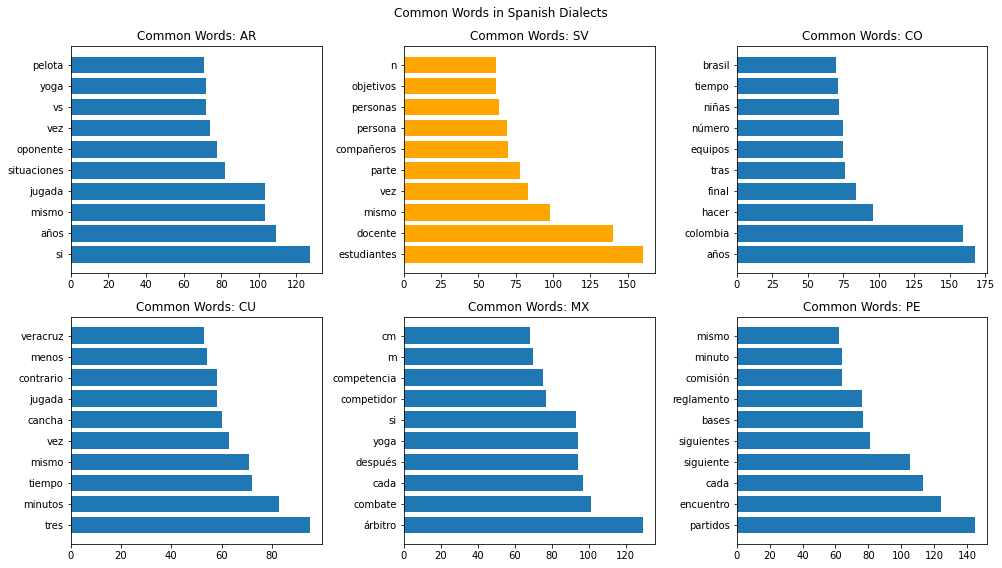

In [6]:
top_k = 10

fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(14,8))

ax11.barh(ar_keys[:top_k], ar_values[:top_k])
ax11.set_title('Common Words: AR')

ax12.barh(sv_keys[:top_k], sv_values[:top_k], color='orange')
ax12.set_title('Common Words: SV')

ax13.barh(co_keys[:top_k], co_values[:top_k])
ax13.set_title('Common Words: CO')

ax21.barh(cu_keys[:top_k], cu_values[:top_k])
ax21.set_title('Common Words: CU')

ax22.barh(mx_keys[:top_k], mx_values[:top_k])
ax22.set_title('Common Words: MX')

ax23.barh(pe_keys[:top_k], pe_values[:top_k])
ax23.set_title('Common Words: PE')

fig.suptitle('Common Words in Spanish Dialects')
fig.tight_layout()

In [ ]:
# https://www.kaggle.com/matleonard/text-classification -> Reference

In [27]:
# Common words in all dialects
ar_set = set(ar_keys)
sv_set = set(sv_keys)
co_set = set(co_keys)
cu_set = set(cu_keys)
mx_set = set(mx_keys)
pe_set = set(pe_keys)

In [28]:
list_sets = [ar_set, sv_set, co_set, cu_set, mx_set, pe_set]

common_words = list(ar_set & sv_set & co_set & cu_set & mx_set & pe_set)

In [29]:
common_words_dict = {}
for word in common_words:
    common_words_dict[word] = 0
    common_words_dict[word] += ar[word]
    common_words_dict[word] += sv[word]
    common_words_dict[word] += co[word]
    common_words_dict[word] += cu[word]
    common_words_dict[word] += mx[word]
    common_words_dict[word] += pe[word]

(-0.5, 1199.5, 599.5, -0.5)

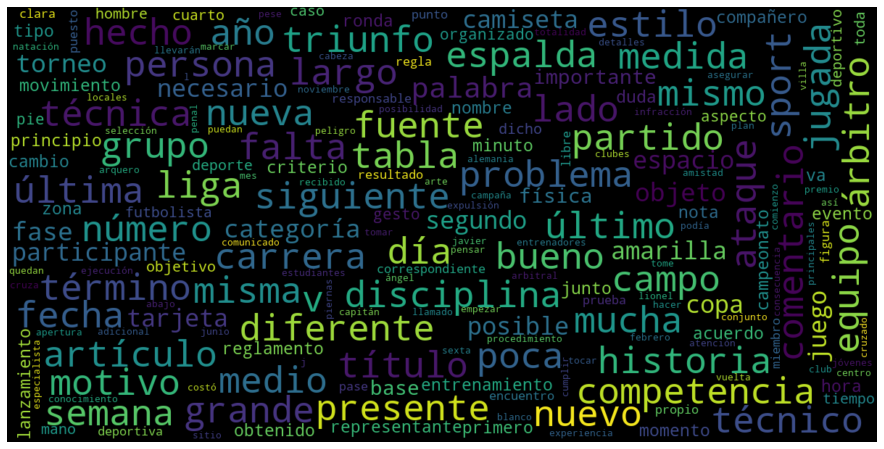

In [70]:
w_cloud = WordCloud(max_font_size=50, width=1200, height=600).generate(' '.join(common_words))
plt.figure(figsize=(16,8))
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")